In [ ]:
# 스택 : 후입 선출, 늦게 넣은 자료를 먼저 꺼낸다
# push() : 요소를 컬렉션에 추가
# pop() : 제거되지 않는 가장 최신 삽입된 요소 제거

In [1]:
# 연결리스트를 이용한 스택 ADT 구현
class Node():
    def __init__(self,item,next):
        self.item=item
        self.next=next

class Stack:
    def __init__(self):
        self.last=None
        
    def push(self,item):
        self.last = Node(item,self.last)
    
    def pop(self):
        item = self.last.item
        self.last = self.last.next
        return item

In [3]:
stack=Stack()
stack.push(1)
stack.push(2)
stack.push(3)
stack.push(4)
stack.push(5)

In [4]:
for _ in range(5):
    print(stack.pop())

5
4
3
2
1


In [24]:
# 괄호로 된 입력갑이 올바른지 판별하라
# 입력 : '()[]{}', 출력 : True
def isValid(s):
    
    stack=[]
    table={')':'(','}':'{',']':'['}
    # 스택 이용 예외 처리 및 일치 여부 판별 
    for char in s:
        if char not in table:                          # table에 없으면 stack에 추가
            stack.append(char)
        elif not stack or table[char] != stack.pop(): # table에 있으면 그 값과 stack의 값을 pop 해서 비교 
            return False                              # stack에 값이 없는 경우도 있으므로 not stack 조건 추가 
        
    return len(stack) == 0                            # 모든 값이 일치하면 pop했었기 때문에 stack 길이가 0, True 반환  

In [25]:
isValid('()[]{}')

True

In [29]:
isValid(')([]{}')

False

In [36]:
# 재귀 함수로 정답 찾기
def removeDuplicateLetters(s):
    # 집합으로 정렬
    for char in sorted(set(s)):                                         # 단어 내의 모든 알파벳 unique 목록(사전 순서대로) 
        suffix = s[s.index(char):]                                      # 해당 단어를 포함한 뒷 단어들이 기존의 알파벳 목록과 같은지
        # 전체 집합과 접미사 집합이 일치할 때 분리 진행                 # 같으면 이전 알파벳 및 중복 알파벳 제외 가능
        if set(s) == set(suffix):                                       # 다르면 다음 알파벳 목록으로 가서 반복 
            return char+removeDuplicateLetters(suffix.replace(char,''))
    return ''

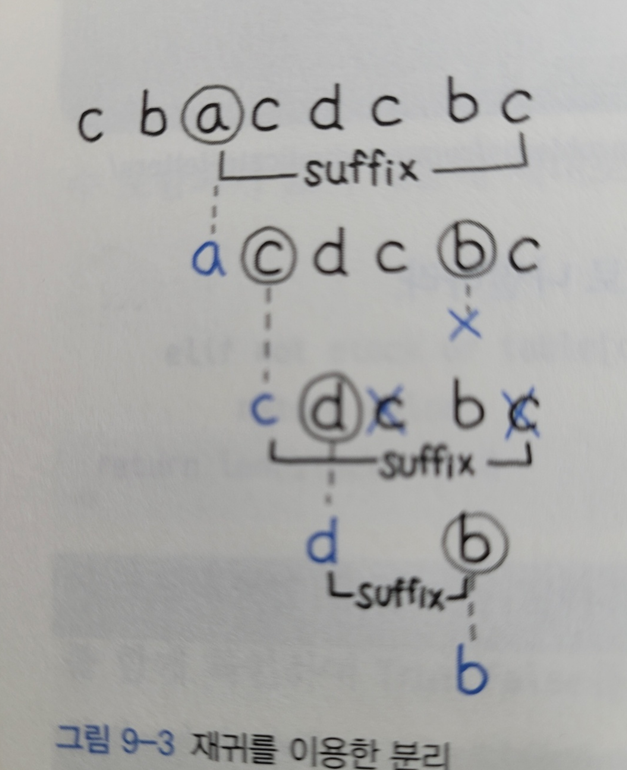

In [37]:
removeDuplicateLetters('bcabc')

'abc'

In [38]:
removeDuplicateLetters('cbacdcbc')

'acdb'

In [45]:
# 스택 이용하기 
# 한 개만 있는 알파벳은 그 순서를 유지(중복만 제거), 여러개 있는 것들은 사전순서대로 정렬시키는 것이 핵심
# continue : 조건 충족 시 반복문에서 continue 아래 코드를 건너띄고 다음 반복문으로 진행

import collections
def removeDuplicateLetters(s):
    counter, seen ,stack = collections.Counter(s),set(),[]
    
    for char in s: 
        counter[char] -=1
        if char in seen:
            continue
        # 뒤에 붙일 문자가 남아있다면 스택에서 제거
        while stack and char < stack[-1] and counter[stack[-1]] > 0: # 현 알파벳이 기존 알파벳보다 앞 순서(2)고 기존 알파벳이 뒤에서도
            seen.remove(stack.pop())                                   # 등장 시(3) 기존 알파벳(stack[-1])을 제거하고 후에 다시 삽입 
        stack.append(char)
        seen.add(char)
    return ''.join(stack)

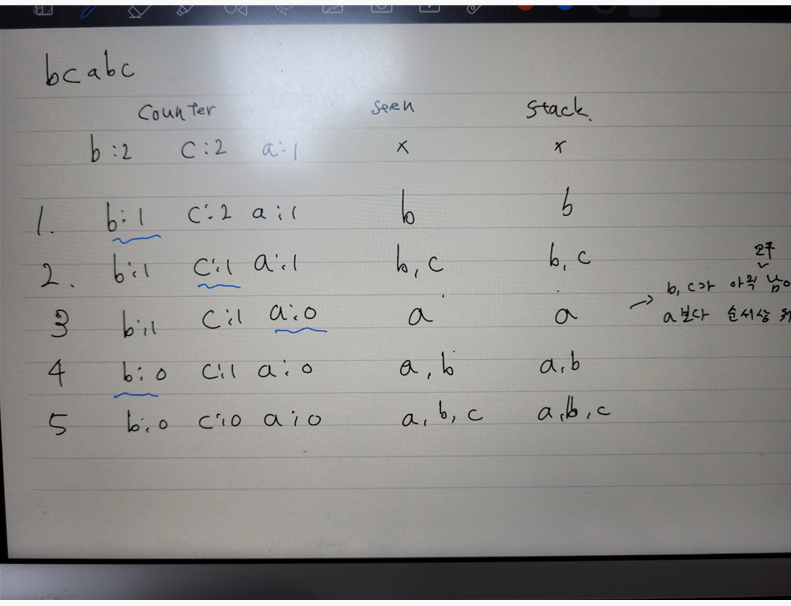

In [46]:
removeDuplicateLetters('bcabc')

'abc'

In [47]:
removeDuplicateLetters('cbacdcbc')

'acdb'

In [52]:
'c'>'b'

True

In [56]:
# 일일 온도 
# 화씨 온도를 입력받아 더 따뜻한 날씨를 위해 며칠을 더 기다려야 하는지를 출력

# 스택에는 처리되지 않은 인덱스들
# 현재 온도인 cur이 바뀔 때, 그것보다 작은 값들을 처리하면서 처리된 인덱스들은 pop으로 제거

T=[73,74,75,71,69,72,76,73]

def dailyTemperatures(T):
    answer=[0]*len(T)
    stack=[]
    for i,cur in enumerate(T):
        # 현재 온도가 스택 값보다 높다면 정답 처리
        while stack and cur > T[stack[-1]]:      # 현재 온도가 이전 온도보다 높을 때만 값을 대입 
            last = stack.pop()
            answer[last] = i -last
        stack.append(i)
    return answer

In [57]:
dailyTemperatures(T)

[1, 1, 4, 2, 1, 1, 0, 0]